# データ生成

In [2]:
# 連続値データの読み込み
from sklearn.datasets import load_boston
boston = load_boston()

# 訓練データとテストデータに分ける
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(boston['data'], boston['target'], test_size=0.3,  random_state=0)

"""
# 標準化（Standardization）
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test) 
scaler = StandardScaler()
y_train_s = scaler.fit_transform(y_train.reshape(len(y_train),1))
y_test_s = scaler.transform(y_test.reshape(len(y_test),1)) 
"""

# 正規化（Normarization）
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler()
X_train_n = scaler_x.fit_transform(X_train)
X_test_n = scaler_x.transform(X_test) 
scaler_y = MinMaxScaler()
y_train_n = scaler_y.fit_transform(y_train.reshape(len(y_train),1))
y_test_n = scaler_y.transform(y_test.reshape(len(y_test),1)) 

# 学習の可視化

In [14]:
# 必要ライブラリのインポート
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras import losses
from keras import optimizers
from keras import callbacks

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# モデル生成
model = Sequential()

# 層の追加
layers=[
    Dense(128, activation='elu'),
    Dropout(0.01),
    Dense(128, activation='selu'),
    Dropout(0.01),
    Dense(64, activation='softmax'),
    Dense(1, activation='linear')
]
for layer in layers:
    model.add(layer)

# モデルの学習設定

model.compile(
    loss=losses.mean_squared_error,
    optimizer=optimizers.Adam(),
    metrics=['acc']
)

# モデルの学習
result = model.fit(
    X_train_n,
    y_train_n,
    batch_size=32,
    epochs=100
)

Epoch 1/100
354/354 [==============================] - 0s 492us/step - loss: 0.1508 - acc: 0.0056
Epoch 2/100
354/354 [==============================] - 0s 115us/step - loss: 0.0750 - acc: 0.0056
Epoch 3/100
354/354 [==============================] - 0s 87us/step - loss: 0.0494 - acc: 0.0056
Epoch 4/100
354/354 [==============================] - 0s 85us/step - loss: 0.0430 - acc: 0.0056
Epoch 5/100
354/354 [==============================] - 0s 87us/step - loss: 0.0420 - acc: 0.0056
Epoch 6/100
354/354 [==============================] - 0s 87us/step - loss: 0.0420 - acc: 0.0056
Epoch 7/100
354/354 [==============================] - 0s 90us/step - loss: 0.0419 - acc: 0.0056
Epoch 8/100
354/354 [==============================] - 0s 99us/step - loss: 0.0419 - acc: 0.0056
Epoch 9/100
354/354 [==============================] - 0s 85us/step - loss: 0.0419 - acc: 0.0056
Epoch 10/100
354/354 [==============================] - 0s 96us/step - loss: 0.0419 - acc: 0.0056
Epoch 11/100
354/354 [=====

354/354 [==============================] - 0s 68us/step - loss: 0.0067 - acc: 0.0367
Epoch 85/100
354/354 [==============================] - 0s 82us/step - loss: 0.0066 - acc: 0.0367
Epoch 86/100
354/354 [==============================] - 0s 82us/step - loss: 0.0072 - acc: 0.0367
Epoch 87/100
354/354 [==============================] - 0s 82us/step - loss: 0.0068 - acc: 0.0367
Epoch 88/100
354/354 [==============================] - 0s 73us/step - loss: 0.0068 - acc: 0.0367
Epoch 89/100
354/354 [==============================] - 0s 84us/step - loss: 0.0066 - acc: 0.0367
Epoch 90/100
354/354 [==============================] - 0s 85us/step - loss: 0.0067 - acc: 0.0367
Epoch 91/100
354/354 [==============================] - 0s 76us/step - loss: 0.0064 - acc: 0.0367
Epoch 92/100
354/354 [==============================] - 0s 76us/step - loss: 0.0067 - acc: 0.0367
Epoch 93/100
354/354 [==============================] - 0s 82us/step - loss: 0.0065 - acc: 0.0367
Epoch 94/100
354/354 [===========

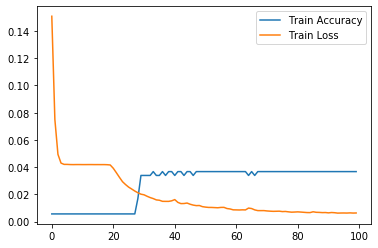

In [4]:
# 描画データ
acc = result.history['acc']  # 学習データの正答率
loss = result.history['loss']  # 学習データの損失

# x軸
epochs = range(len(acc))

# 図示
plt.plot(epochs, acc, label='Train Accuracy')
plt.plot(epochs, loss, label='Train Loss')
plt.legend()
plt.show()

# モデルの再利用

In [5]:
# モデルの保存
model.save('./model/model.h5')

In [6]:
# モデルの読み込み
model = keras.models.load_model('./model/model.h5')

In [7]:
# 予測値の算出
y_predict_n = model.predict(X_test_n)
y_predict = scaler_y.inverse_transform(y_predict_n)
print(y_predict)

[[23.483969]
 [24.766287]
 [23.806585]
 [12.333273]
 [21.112717]
 [21.191795]
 [21.848335]
 [21.892115]
 [20.57397 ]
 [14.285079]
 [11.522707]
 [12.210116]
 [14.566025]
 [11.804705]
 [41.781174]
 [35.450672]
 [23.488811]
 [39.708694]
 [31.337511]
 [22.619009]
 [23.419153]
 [21.606627]
 [18.335758]
 [25.907326]
 [22.609201]
 [12.958565]
 [17.58334 ]
 [16.927458]
 [40.884777]
 [18.266502]
 [14.916701]
 [17.81334 ]
 [20.044666]
 [21.70792 ]
 [25.059404]
 [19.523363]
 [11.857098]
 [25.961952]
 [13.243934]
 [12.842822]
 [23.509737]
 [21.77988 ]
 [22.008604]
 [14.486663]
 [21.95542 ]
 [22.552746]
 [21.453815]
 [21.351452]
 [14.914372]
 [21.649141]
 [16.293423]
 [19.614782]
 [22.129154]
 [38.019875]
 [13.53823 ]
 [21.737888]
 [21.558535]
 [18.377367]
 [11.986533]
 [21.02103 ]
 [20.915161]
 [21.308731]
 [36.70846 ]
 [36.14476 ]
 [17.172916]
 [35.727425]
 [15.66587 ]
 [17.689003]
 [12.668243]
 [22.67545 ]
 [20.8894  ]
 [22.624294]
 [29.200367]
 [29.930744]
 [34.413143]
 [11.777473]
 [41.754234]

# コールバック

コールバックは訓練中で適用される関数集合です。訓練中にモデル内部の状態と統計量を可視化する際に、コールバックを使います。


> コールバックについて紹介する前に、データセットの種類について紹介します。
> 
> + **訓練データ**：重み更新に使用する。
> + **テストデータ**：モデル性能の検証に利用する。
> + **検証データ(バリデーションデータ)**：学習の早期終了（EarlyStopping）やハイパーパラメータの調整に利用する
> 
> ＊ ほとんどの場合、ハイパーパラメータの調整は、訓練データを用いて行うため、気にしなくてよいが、学術的なデータ解析の際には、検証用データも使用する。ほとんどの実務的な場合においては、検証データは、学習の早期終了などに用いられると考えてよい。


**学習の早期終了（EarlyStopping）**：バリデーションデータへの精度に基づいて、改善しなかった場合は、学習を早期に打ち切り、過学習の防止に務める。
**学習過程の保存（ModelCheckpoint）**：学習の途中経過を記録しておく。今まで見てきた手法では、学習終了時点のモデルを採用し、予測値の算出を行ったが、学習途中の精度が良い場合がある。そのような場合は、このModelCheckpointで記録しておいたモデルの中から、最も精度のいいモデルを採用する。

### 学習の早期終了（EarlyStopping）

In [8]:
# モデル生成
model = Sequential()

# 層の追加
layers=[
    Dense(128, activation='elu'),
    Dropout(0.01),
    Dense(128, activation='selu'),
    Dropout(0.01),
    Dense(64, activation='softmax'),
    Dense(1, activation='linear')
]
for layer in layers:
    model.add(layer)

# モデルの学習設定

model.compile(
    loss=losses.mean_squared_error,
    optimizer=optimizers.Adam(),
    metrics=['acc']
)

# モデルの学習
result = model.fit(
    X_train_n,
    y_train_n,
    batch_size=32,
    epochs=100, 
    validation_split=0.2, 
    callbacks=[callbacks.EarlyStopping(monitor='val_loss')]
)

Train on 283 samples, validate on 71 samples
Epoch 1/100
283/283 [==============================] - 0s 729us/step - loss: 0.1584 - acc: 0.0035 - val_loss: 0.1051 - val_acc: 0.0141
Epoch 2/100
283/283 [==============================] - 0s 92us/step - loss: 0.0866 - acc: 0.0035 - val_loss: 0.0593 - val_acc: 0.0141
Epoch 3/100
283/283 [==============================] - 0s 81us/step - loss: 0.0553 - acc: 0.0035 - val_loss: 0.0455 - val_acc: 0.0141
Epoch 4/100
283/283 [==============================] - 0s 102us/step - loss: 0.0460 - acc: 0.0035 - val_loss: 0.0421 - val_acc: 0.0141
Epoch 5/100
283/283 [==============================] - 0s 102us/step - loss: 0.0433 - acc: 0.0035 - val_loss: 0.0412 - val_acc: 0.0141
Epoch 6/100
283/283 [==============================] - 0s 106us/step - loss: 0.0421 - acc: 0.0035 - val_loss: 0.0407 - val_acc: 0.0141
Epoch 7/100
283/283 [==============================] - 0s 116us/step - loss: 0.0413 - acc: 0.0035 - val_loss: 0.0395 - val_acc: 0.0141
Epoch 8/100


### 学習過程の保存（ModelCheckpoint）

In [9]:
# モデル生成
model = Sequential()

# 層の追加
layers=[
    Dense(128, activation='elu'),
    Dropout(0.01),
    Dense(128, activation='selu'),
    Dropout(0.01),
    Dense(64, activation='softmax'),
    Dense(1, activation='linear')
]
for layer in layers:
    model.add(layer)

# モデルの学習設定

model.compile(
    loss=losses.mean_squared_error,
    optimizer=optimizers.Adam(),
    metrics=['acc']
)

# モデルの学習
result = model.fit(
    X_train_n,
    y_train_n,
    batch_size=32,
    epochs=10,
    validation_data=(X_test_n,y_test_n),
    callbacks=[
        callbacks.ModelCheckpoint(
            filepath = './model/best_model.h5', 
            monitor='val_loss', 
            save_best_only=True,)
    ]
)

Train on 354 samples, validate on 152 samples
Epoch 1/10
354/354 [==============================] - 0s 604us/step - loss: 0.1609 - acc: 0.0056 - val_loss: 0.0954 - val_acc: 0.0000e+00
Epoch 2/10
354/354 [==============================] - 0s 101us/step - loss: 0.0770 - acc: 0.0056 - val_loss: 0.0485 - val_acc: 0.0000e+00
Epoch 3/10
354/354 [==============================] - 0s 101us/step - loss: 0.0472 - acc: 0.0056 - val_loss: 0.0416 - val_acc: 0.0000e+00
Epoch 4/10
354/354 [==============================] - 0s 107us/step - loss: 0.0427 - acc: 0.0056 - val_loss: 0.0411 - val_acc: 0.0000e+00
Epoch 5/10
354/354 [==============================] - 0s 69us/step - loss: 0.0420 - acc: 0.0056 - val_loss: 0.0412 - val_acc: 0.0000e+00
Epoch 6/10
354/354 [==============================] - 0s 156us/step - loss: 0.0419 - acc: 0.0056 - val_loss: 0.0413 - val_acc: 0.0000e+00
Epoch 7/10
354/354 [==============================] - 0s 144us/step - loss: 0.0419 - acc: 0.0056 - val_loss: 0.0414 - val_acc: 

In [10]:
# 損失算出
y_predict_n = model.predict(X_test_n)
losses.mean_squared_error(y_predict_n.reshape(1,len(y_predict_n))[0],y_test_n.reshape(1,len(y_test_n))[0])

<tf.Tensor: id=16768, shape=(), dtype=float32, numpy=0.04146367>

In [11]:
# 最適モデルの損失算出
model = keras.models.load_model('./model/best_model.h5')
y_predict_n = model.predict(X_test_n)
losses.mean_squared_error(y_predict_n.reshape(1,len(y_predict_n))[0],y_test_n.reshape(1,len(y_test_n))[0])

<tf.Tensor: id=18373, shape=(), dtype=float32, numpy=0.041149836>

# 自作のコールバック関数

コールバック関数は、自作したものを使用することもできる。

今回は、EPOCH毎に、精度を描画するコールバック関数を実装する。

In [19]:
class LossHistory(keras.callbacks.Callback):
    def __init__(self):
        # 各epoch毎にlossを格納していく
        self.loss = []

    def on_epoch_end(self, epoch, logs={}):
        """各epoch終了ごとに呼び出される
        """
        # lossを格納
        self.loss.append(logs['loss'])
        
        # グラフ初期化
        clear_output(wait = True)
        
        # グラフ描画部
        plt.figure(num=1, clear=True)
        plt.title('loss')
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.plot(self.loss, label='train')
        plt.pause(0.1)

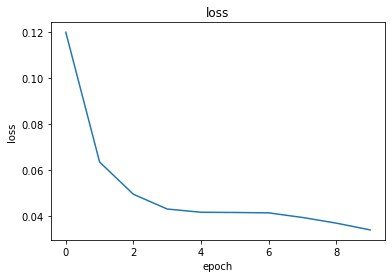

In [20]:
# 必要ライブラリのインポート
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras import losses
from keras import optimizers
from keras import callbacks
import os
from IPython.display import clear_output

# モデル生成
model = Sequential()

# 層の追加
layers=[
    Dense(128, activation='elu'),
    Dropout(0.01),
    Dense(128, activation='selu'),
    Dropout(0.01),
    Dense(64, activation='softmax'),
    Dense(1, activation='linear')
]
for layer in layers:
    model.add(layer)

# モデルの学習設定

model.compile(
    loss=losses.mean_squared_error,
    optimizer=optimizers.Adam(),
    metrics=['acc']
)

# モデルの学習
result = model.fit(
    X_train_n,
    y_train_n,
    batch_size=32,
    epochs=10,
    verbose=False,
    validation_data=(X_test_n,y_test_n),
    callbacks=[
        LossHistory()
    ]
)